In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install sklearn

^C
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from nltk.classify import SklearnClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv('C:/Users/Abhis/model1ppy/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


now we will write a function for us to clean the csv file to get rid of punctuation marks and converting to lowercase


In [ ]:
def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

data['clean_text'] = data['review'].apply(clean_text)


Now we will use NLTK sentimenintensityanalyzer

In [ ]:
sentimentdata = SentimentIntensityAnalyzer()


In [ ]:
def sentiment_analysis(text):
    sentiment = sentimentdata.polarity_scores(text)
    if sentiment['compound'] > 0:
        return 'Positive'
    elif sentiment['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['clean_text'].apply(sentiment_analysis)


In [ ]:
positive_words = ' '.join(data[data['sentiment'] == 'Positive']['clean_text'])
negative_words = ' '.join(data[data['sentiment'] == 'Negative']['clean_text'])


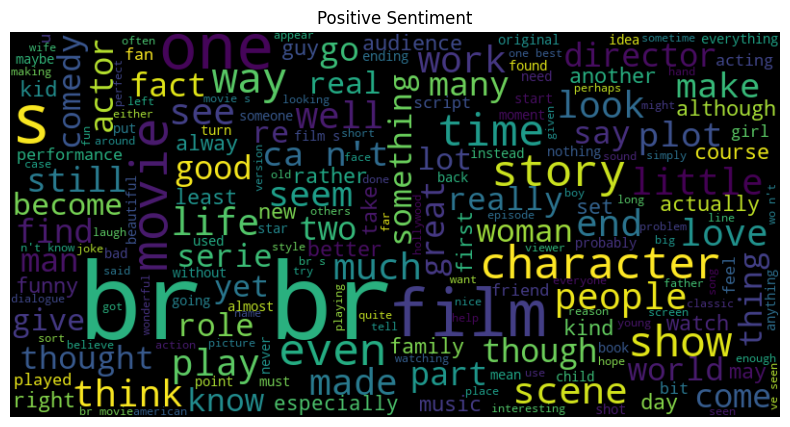

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment")
plt.show()


In [17]:
from wordcloud import WordCloud

now we've analysed the data as well as made a wordcloud out of it 

note that we will also train a model using termfrequency - inversedocfrequency  vectorizer to transform textual data into a set of numbers , then we will use logistic regression in order to make the model 

In [24]:
sentiment_counts = data['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
sentiment
Positive    34441
Negative    15514
Neutral        45
Name: count, dtype: int64


visualisation of sentiment distribution/4

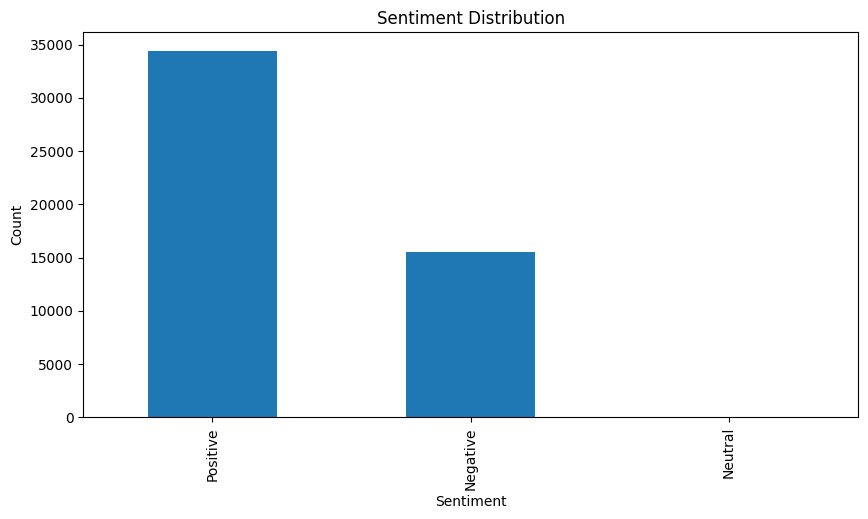

In [25]:
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


here we are going to start to make the model


In [30]:
X = data['clean_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [31]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [32]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [33]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8849
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.76      0.80      3031
     Neutral       0.00      0.00      0.00         4
    Positive       0.90      0.94      0.92      6965

    accuracy                           0.88     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[2291    0  740]
 [   2    0    2]
 [ 407    0 6558]]


c:\Users\Abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abhis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
new_review = "This movie was amazing! I loved the plot and the acting was superb."
new_review_clean = clean_text(new_review)
new_review_tfidf = vectorizer.transform([new_review_clean])
prediction = model.predict(new_review_tfidf)
print("Prediction:", prediction[0])


Prediction: Positive


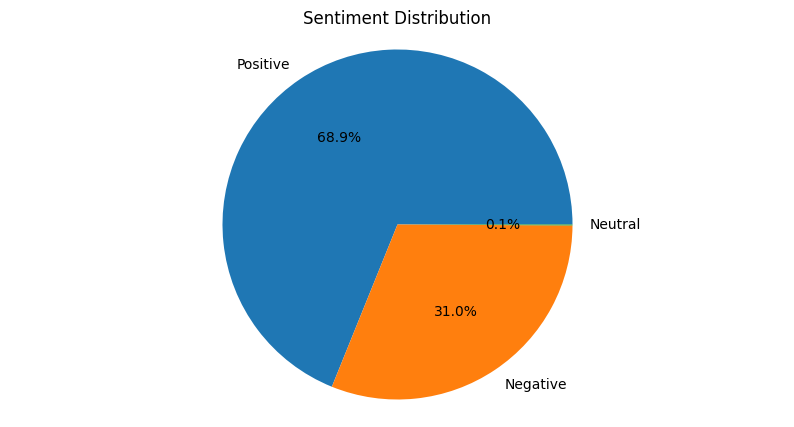

In [38]:

plt.figure(figsize=(10, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Sentiment Distribution")
plt.show()
